In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import os
import glob
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
df=pd.read_csv('/content/gdrive/MyDrive/Stock_price-Sentiment-Analysis/Data.csv', encoding = "ISO-8859-1")
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",Hammers hand Robson a youthful lesson,Saints party like it's 1999,Wear wolves have turned into lambs,Stump mike catches testy Gough's taunt,Langer escapes to hit 167,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,A tale of two tails,I say what I like and I like what I say,"Elbows, Eyes and Nipples",Task force to assess risk of asteroid collision,How I found myself at last,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,Pele turns up heat on Ferguson,Party divided over Kohl slush fund scandal,Manchester United (England),Women in record South Pole walk,Vasco da Gama (Brazil),South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,"Our choice, not theirs",Profile of former US Nazi Party officer Willia...,New evidence shows record of war crimes suspec...,The rise of the supernerds,Written on the body,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",Met faces fresh attack on race crime,Everton fans top racist 'league of shame',"Our breasts, ourselves",Russia's new boss has an extremely strange his...,Always and forever,Most everywhere: UDIs,Most wanted: Chloe lunettes,

In [4]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [5]:
train['Label'].unique()

array([0, 1])

In [24]:
# data cleaning 
def data_pre_processing(data):
  corpus = []
  for i in range(len(data)):
      review = re.sub('[^a-zA-Z]', ' ', data[i])
      review = re.sub("what's", "what is ", review )
      review = re.sub("\'ve", " have ", review )
      review = re.sub("can't", "cannot ", review )
      review = re.sub("n't", " not ", review )
      review = re.sub("i'm", "i am ", review )
      review = re.sub("\'ll", " will ", review )
      review = re.sub("he's", " he is ", review )
      review = re.sub("i've", " i have ", review )
      review = re.sub("--", "", review )
      review = review.lower()
      review = review.split()
      review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
      review = ' '.join(review)
      corpus.append(review)
  return corpus

In [7]:
# Renaming column names for ease of access
data=train.iloc[:,2:27]
data.head(5)
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",Hammers hand Robson a youthful lesson,Saints party like it's 1999,Wear wolves have turned into lambs,Stump mike catches testy Gough's taunt,Langer escapes to hit 167,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,A tale of two tails,I say what I like and I like what I say,"Elbows, Eyes and Nipples",Task force to assess risk of asteroid collision,How I found myself at last,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,Pele turns up heat on Ferguson,Party divided over Kohl slush fund scandal,Manchester United (England),Women in record South Pole walk,Vasco da Gama (Brazil),South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,"Our choice, not theirs",Profile of former US Nazi Party officer Willia...,New evidence shows record of war crimes suspec...,The rise of the supernerds,Written on the body,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",Met faces fresh attack on race crime,Everton fans top racist 'league of shame',"Our breasts, ourselves",Russia's new boss has an extremely strange his...,Always and forever,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play no

In [8]:
# Convertng headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,a 'hindrance to operations': extracts from the...,scorecard,hughes' instant hit buoys blues,jack gets his skates on at ice-cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar's debut double,"southgate strikes, leeds pay the penalty",hammers hand robson a youthful lesson,saints party like it's 1999,wear wolves have turned into lambs,stump mike catches testy gough's taunt,langer escapes to hit 167,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl's successor drawn into scandal,the difference between men and women,"sara denver, nurse turned solicitor",diana's landmine crusade put tories in a panic,yeltsin's resignation caught opposition flat-f...,russian roulette,sold out,recovering a title


In [9]:
' '.join(str(x) for x in data.iloc[1,0:25])

"scorecard the best lake scene leader: german sleaze inquiry cheerio, boyo the main recommendations has cubie killed fees? has cubie killed fees? has cubie killed fees? hopkins 'furious' at foster's lack of hannibal appetite has cubie killed fees? a tale of two tails i say what i like and i like what i say elbows, eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man's extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn't know without the movies millennium bug fails to bite"

In [10]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))
# data pre-processing 
headlines=data_pre_processing(headlines)
headlines[0]

"'hindrance operations': extract leaked report scorecard hughes' instant hit buoy blue jack get skate ice-cold alex chaos maracana build united depleted leicester prevail elliott spoil everton's party hungry spur sense rich picking gunner wide easy target derby raise glass strupar's debut double southgate strikes, leeds pay penalty hammer hand robson youthful lesson saint party like 1999 wear wolf turned lamb stump mike catch testy gough's taunt langer escape hit 167 flintoff injury pile woe england hunter threaten jospin new battle somme kohl's successor drawn scandal difference men woman sara denver, nurse turned solicitor diana's landmine crusade put tory panic yeltsin's resignation caught opposition flat-footed russian roulette sold recovering title"

In [21]:
headlines[12]

"homes alone won't make us world beaters wembley crackdown on pirate hospitality keegan calls for pay curb backing for saint jones leboeuf rises to bates south africa test averages wasim loses way after milestone swann asked to hang around rousing finale to an old refrain lords back trial by jury hollywood star hedy lamarr dies lords reform britain's ethical foreign policy: keeping the hawk jets in action the £5bn conflict of interest should you be investing in your future? is postgraduate study for you? turn these clients away the generals profit as the people pay with their lives the wakeham commission recommendations vanessa feltz returns to daytime television tesco leads the world online growth and profit cybersurfing: window shopping on the web bargain hunting:  how to compare prices cybershopping's 50 favourite sites falling for vertigo by wg sebald"

## Random Forest With Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier


In [ ]:
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

In [ ]:
#RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_transform=data_pre_processing(test_transform)
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

In [ ]:
report=classification_report(test['Label'],predictions)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.70      0.82       186
           1       0.78      0.99      0.87       192

    accuracy                           0.85       378
   macro avg       0.88      0.85      0.85       378
weighted avg       0.88      0.85      0.85       378



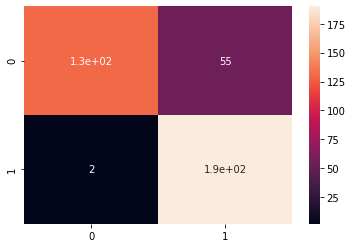

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
matrix=confusion_matrix(test['Label'],predictions)
import seaborn as sns
sns.heatmap(matrix, annot=True)

### Random Forest with TFIDF

In [ ]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25])) 
headlines_process=data_pre_processing(headlines)
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_data_process=data_pre_processing(test_transform)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=3500, min_df = 5, max_df = 0.6)
X_data_train = vectorizer.fit_transform(headlines_process)
y_label_train=train['Label']
X_data_test = vectorizer.fit_transform(test_data_process)
y_label_test=test['Label']

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X_train_tfid = transformer.fit_transform(X_data_train).toarray()
X_test_tfid = transformer.fit_transform(X_data_test).toarray()
print(X_train_tfid.shape,y_label_train.shape,X_test_tfid.shape,y_label_test.shape)


(3975, 3500) (3975,) (378, 3500) (378,)


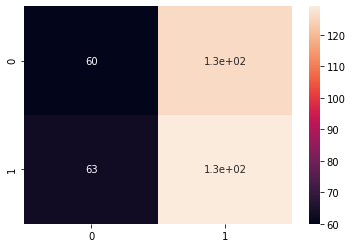

In [ ]:
#RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(X_train_tfid,y_label_train)
predictions = randomclassifier.predict(X_test_tfid)
matrix=confusion_matrix(test['Label'],predictions)
import seaborn as sns
sns.heatmap(matrix, annot=True)

In [ ]:
report=classification_report(test['Label'],predictions)
print(report)

              precision    recall  f1-score   support

           0       0.49      0.32      0.39       186
           1       0.51      0.67      0.58       192

    accuracy                           0.50       378
   macro avg       0.50      0.50      0.48       378
weighted avg       0.50      0.50      0.48       378



## LSTM With Pre Trained Word2Vec

In [ ]:
import keras
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from keras.layers import Dropout

In [ ]:
import numpy as np
filepath = "/content/gdrive/MyDrive/pre-tranid-embedding/GoogleNews-vectors-negative300-001.bin"

embeddings_index = {}
from gensim.models import KeyedVectors
wv_from_bin = KeyedVectors.load_word2vec_format(filepath, binary=True) 
for word, vector in zip(wv_from_bin.vocab, wv_from_bin.vectors):
    coefs = np.asarray(vector, dtype='float32')
    embeddings_index[word] = coefs
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 3000000 word vectors.


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
#preparing vocabulary
tokenizer.fit_on_texts(list(headlines))
x_tr_seq  = tokenizer.texts_to_sequences(headlines) 
x_val_seq = tokenizer.texts_to_sequences(test_transform)
#padding to prepare sequences of same length
x_tr_seq  = pad_sequences(x_tr_seq, maxlen=100)
x_val_seq = pad_sequences(x_val_seq, maxlen=100)

In [ ]:
size_of_vocabulary=len(tokenizer.word_index) + 1 #+1 for padding
print(size_of_vocabulary)

57374


In [ ]:
embedding_matrix = np.zeros((size_of_vocabulary, 300))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
model=Sequential()
#model.add(Embedding(input_dim=vocab_size, output_dim=emdedding_size,weights=[pretrained_weights],trainable=False))
model.add(Embedding(size_of_vocabulary,300,weights=[embedding_matrix],input_length=100,trainable=False))
model.add(LSTM(100))# 100 neuron 
model.add(Dropout(0.3))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(np.array(x_tr_seq),np.array(train['Label']),batch_size=35,epochs=20,validation_data=(np.array(x_val_seq),np.array(test['Label'])))

Epoch 1/20
114/114 [==============================] - 6s 35ms/step - loss: 0.6943 - accuracy: 0.5208 - val_loss: 0.6933 - val_accuracy: 0.5079
Epoch 2/20
114/114 [==============================] - 3s 30ms/step - loss: 0.6928 - accuracy: 0.5221 - val_loss: 0.6876 - val_accuracy: 0.5714
Epoch 3/20
114/114 [==============================] - 3s 30ms/step - loss: 0.6846 - accuracy: 0.5571 - val_loss: 0.6778 - val_accuracy: 0.5635
Epoch 4/20
114/114 [==============================] - 3s 30ms/step - loss: 0.6691 - accuracy: 0.5899 - val_loss: 0.6743 - val_accuracy: 0.5926
Epoch 5/20
114/114 [==============================] - 3s 29ms/step - loss: 0.6400 - accuracy: 0.6268 - val_loss: 0.6571 - val_accuracy: 0.6508
Epoch 6/20
114/114 [==============================] - 3s 29ms/step - loss: 0.5956 - accuracy: 0.6841 - val_loss: 0.6389 - val_accuracy: 0.6720
Epoch 7/20
114/114 [==============================] - 3s 29ms/step - loss: 0.5437 - accuracy: 0.7297 - val_loss: 0.6234 - val_accuracy: 0.7037

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


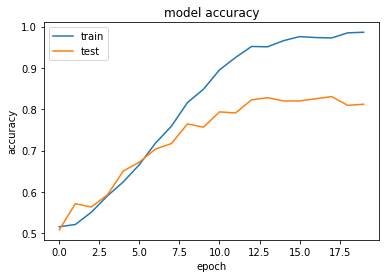

In [ ]:
import matplotlib.pyplot as plt
import numpy
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# Making the Confusion Matrix
y_pred=model.predict_classes(np.array(x_val_seq))
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_pred,np.array(test['Label'])))


Classification Report

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       189
           1       0.81      0.82      0.81       189

    accuracy                           0.81       378
   macro avg       0.81      0.81      0.81       378
weighted avg       0.81      0.81      0.81       378



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


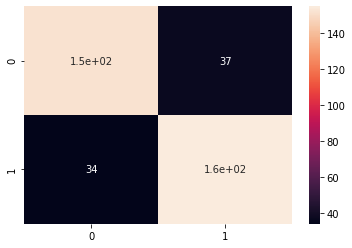

In [ ]:
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)
cm =confusion_matrix(y_pred,np.array(test['Label']))
import seaborn as sns
sns.heatmap(cm, annot=True)

## Ensemble Modeling (Bagging)

In [23]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25])) 
headlines_process=data_pre_processing(headlines)
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_data_process=data_pre_processing(test_transform)

In [48]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import tree

X_train = headlines_process
X_test = test_data_process
y_train = train['Label']
y_test = test['Label']

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', BaggingClassifier(tree.DecisionTreeClassifier())),
                     ])

text_clf.fit(X_train, y_train)


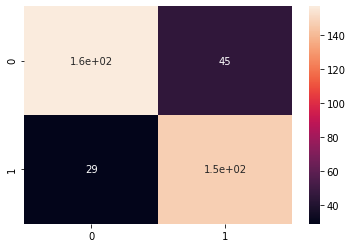

In [53]:
predicted = text_clf.predict(X_test)
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)
cm =confusion_matrix(predicted,np.array(test['Label']))
import seaborn as sns
sns.heatmap(cm, annot=True)

In [54]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       186
           1       0.84      0.77      0.80       192

    accuracy                           0.80       378
   macro avg       0.81      0.80      0.80       378
weighted avg       0.81      0.80      0.80       378

